In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Perfect sensor
def sense(x):
    return x

In [59]:
def simulate(Δt, x, u, wind_std):
    wind_constant = np.array([0.1, 0.1])
    x += Δt * (u + wind_constant)

    wind_random = np.random.normal(0, wind_std, size=x.shape)
    x += Δt * u +  wind_random + wind_constant  
    return x

In [60]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = -np.sin(t)
    uy = np.cos(t) 
    return np.array([ux, uy])

In [61]:
tf = 10.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = np.array([1., 0.])
x_log = [np.copy(x)]
wind_std = 0.1

for t in time:
    y = sense(x)
    u = control(t, y)    
    x_updated = simulate(Δt, x, u, wind_std)
    x_log.append(np.copy(x_updated))
    
x_log = np.array(x_log)

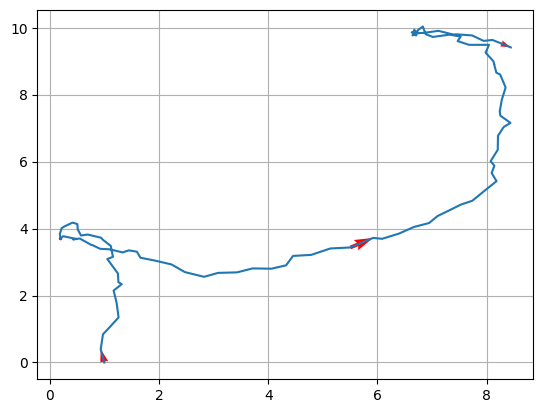

In [62]:
plt.grid()
plt.plot(x_log[:,0], x_log[:,1])

num_arrows = 5
arrow_indices = np.linspace(0, len(x_log) - 2, num_arrows, dtype=int)

# Adding arrows
for i in arrow_indices:
    dx = x_log[i + 1, 0] - x_log[i, 0]  # change in x
    dy = x_log[i + 1, 1] - x_log[i, 1]  # change in y
    plt.quiver(x_log[i, 0], x_log[i, 1], dx, dy, 
               angles='xy', scale_units='xy', scale=1, color='red')

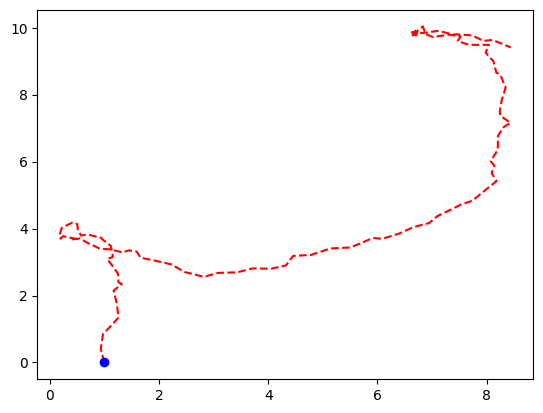

In [63]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    

fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plt.plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plt.plot(x_log[t,0], x_log[t,1], 'bo')
    
    

plt.anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(plt.anim.to_jshtml())